In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
delay = pd.read_csv('delay.csv')
flights_details = pd.read_csv('flights_details.csv', parse_dates=["departure_time", "arrival_time"])
flights_info = pd.read_csv('flights_info.csv')
planes = pd.read_csv('planes.csv', sep=";")


In [2]:
# Convert data
delay["delay"]=pd.to_timedelta(delay.delay+":00")

flights_details = flights_details.astype({'status': 'category'})



In [3]:
#EDA
dataframes= {'airlines': airlines, 'airports': airports, 'delay': delay, 
            'flights_details': flights_details, 'flights_info': flights_info, 'planes': planes}

for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print("--------------")
    print(df.head())
    print(df.info())
    print("\n")

DataFrame: airlines
--------------
  airline_id                                  airline_name         country
0        GNL                                   135 Airways   United States
1        RNX                                 1Time Airline    South Africa
2        WYT  2 Sqn No 1 Elementary Flying Training School  United Kingdom
3        TFU                               213 Flight Unit          Russia
4        CHD                 223 Flight Unit State Airline          Russia
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5808 entries, 0 to 5807
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline_id    5808 non-null   object
 1   airline_name  5808 non-null   object
 2   country       5803 non-null   object
dtypes: object(3)
memory usage: 136.3+ KB
None


DataFrame: airports
--------------
  airport_id                                 airport_name          city  \
0       AYGA                            

### 1. Combien y a-t-il de vols en cours et combien de destinations différentes sont desservies ?

In [4]:
# Fight ongoing
flights_details.pivot_table(index="status", values="flight_id", aggfunc='count')


C:\Users\J-P-F\AppData\Local\Temp\ipykernel_86396\3659173356.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights_details.pivot_table(index="status", values="flight_id", aggfunc='count')


,flight_id
status,
Delayed,282
Estimated,980
Landed,111
Scheduled,27
Unknown,4


In [5]:
# Number of destination
len(airports.city)

7698

### 2. Quelle est la compagnie aérienne avec le plus grand nombre de vols pour une journée donnée ?

In [6]:
# Merg dataset
flights=flights_details.merge(flights_info, on="flight_id")
flights_airlines=flights.merge(airlines, on="airline_id")
flights_airlines.head()

# Create a departure date column
flights_airlines["departure_date"]=flights_airlines["departure_time"].dt.date

# Pivot table with date in the index
number_derpature=flights_airlines.pivot_table(index="departure_date", columns="airline_name", 
                             values="flight_id", aggfunc="count", fill_value=0, sort=True)

# Number max of flight during a day
number_derpature.values.max()

60

In [7]:
# Day with the highest number of derpature for a company
print(number_derpature.max(1))
print("\n")
# Comapny with the highest number of derpature
print(number_derpature.idxmax(axis=1))
print("\n")
# Checking
print(number_derpature.loc[:,"United Airlines"])

departure_date
1970-01-01     2
2024-12-15     7
2024-12-16    60
dtype: int64


departure_date
1970-01-01            DHL Air
2024-12-15      Qatar Airways
2024-12-16    United Airlines
dtype: object


departure_date
1970-01-01     0
2024-12-15     0
2024-12-16    60
Name: United Airlines, dtype: int64


### 3. Quels sont les trois avions les plus utilisés (modèle d'avion) et combien d'heures de vol ont-ils effectuées ?

In [8]:
# Marge datadet
flights_planes=flights_airlines.merge(planes, on="plane_id")
flights_planes.head()


,flight_id,departure_time,arrival_time,passenger_count,status,flight_number,origin_airport_id,destination_airport_id,airline_id,plane_id,airline_name,country,departure_date,manufacturer,model,seating_capacity
0,385baa85,2024-12-15 14:42:00+00:00,2024-12-15 21:29:00+00:00,189,Landed,FX9887,KMEM,PANC,FDX,B77L,Federal Express,United States,2024-12-15,BOEING,Boeing 777-200LRF/LR,191
1,385c1e68,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,191,Estimated,ET506,HAAB,SBGR,ETH,B77L,Ethiopian Airlines,Ethiopia,1970-01-01,BOEING,Boeing 777-200LRF/LR,191
2,385c3e91,2024-12-15 19:55:00+00:00,2024-12-16 12:55:00+00:00,116,Landed,DL201,FAOR,KATL,DAL,A359,Delta Air Lines,United States,2024-12-15,AIRBUS,Airbus 350-900,149
3,385c6eee,2024-12-15 22:15:00+00:00,2024-12-16 15:55:00+00:00,2,Estimated,QF4,KJFK,NZAA,QFA,B789,Qantas,Australia,2024-12-15,BOEING,Boeing 787-9 Dreamliner,2
4,385c905b,2024-12-15 23:00:00+00:00,2024-12-16 14:55:00+00:00,127,Estimated,QR920,OTHH,NZAA,QTR,A35K,Qatar Airways,Qatar,2024-12-15,AIRBUS,Airbus A350-1000 XWB,178


In [9]:
# The 3 most used flights
flights_planes.pivot_table(index="model", values="flight_id", aggfunc="count").nlargest(3, "flight_id")

,flight_id
model,
Boeing 777-300ER,206
Boeing 787-9 Dreamliner,192
Airbus 350-900,115


In [10]:
# Flifhts duration
flights_planes["flights_duration"]= flights_planes["arrival_time"]-flights_planes["departure_time"]

flights_planes.loc[flights_planes.model.isin(["Boeing 777-300ER", 
                                              "Boeing 787-9 Dreamliner", 
                                              "Airbus 350-900"])].pivot_table(index="model",
                                                                              values="flights_duration",
                                                                              aggfunc="sum").sort_values("flights_duration", ascending=False)

,flights_duration
model,
Boeing 777-300ER,99 days 14:20:00
Boeing 787-9 Dreamliner,91 days 04:59:00
Airbus 350-900,57 days 10:20:00


### 5. Quelle est la moyenne du nombre de passagers par vol pour chaque compagnie ?

In [11]:
airlines_nb_flights=flights_planes.pivot_table(index="airline_name", values="flight_id", aggfunc="count")
airlines_nb_flights

,flight_id
airline_name,
AC Challenge Aero,2
ACT Havayollari,1
Aer Lingus,1
AeroMéxico,10
Aeroflot Russian Airlines,11
...,...
Volaris,2
WestJet,5
Wizz Air,6


In [12]:
airlines_passenger=flights_planes.pivot_table(index="airline_name", values="passenger_count", aggfunc="sum")
airlines_passenger

,passenger_count
airline_name,
AC Challenge Aero,17
ACT Havayollari,9
Aer Lingus,238
AeroMéxico,1609
Aeroflot Russian Airlines,1442
...,...
Volaris,105
WestJet,468
Wizz Air,152


In [13]:
airlines_nb_flights_passenger_count=airlines_nb_flights.merge(airlines_passenger, on="airline_name")
airlines_nb_flights_passenger_count["passenger_mean"]=airlines_nb_flights_passenger_count.passenger_count/ airlines_nb_flights_passenger_count.flight_id
print(airlines_nb_flights_passenger_count["passenger_mean"])

airline_name
AC Challenge Aero              8.500000
ACT Havayollari                9.000000
Aer Lingus                   238.000000
AeroMéxico                   160.900000
Aeroflot Russian Airlines    131.090909
                                ...    
Volaris                       52.500000
WestJet                       93.600000
Wizz Air                      25.333333
Xiamen Airlines               99.500000
easyJet                      131.200000
Name: passenger_mean, Length: 189, dtype: float64


### 6. Quel est le numéro du dernier vol pour chaque compagnie aérienne ?

In [14]:
last_flights=flights_planes.pivot_table(index='airline_name', values='arrival_time', aggfunc='max').reset_index()
last_flights

,airline_name,arrival_time
0,AC Challenge Aero,2024-12-16 18:40:00+00:00
1,ACT Havayollari,2024-12-16 13:25:00+00:00
2,Aer Lingus,2024-12-16 14:30:00+00:00
3,AeroMéxico,2024-12-16 21:50:00+00:00
4,Aeroflot Russian Airlines,2024-12-16 19:10:00+00:00
...,...,...
184,Volaris,2024-12-16 14:57:00+00:00
185,WestJet,2024-12-16 18:36:00+00:00
186,Wizz Air,2024-12-16 15:45:00+00:00
187,Xiamen Airlines,2024-12-16 22:00:00+00:00


In [15]:
last_flights.merge(flights_planes.loc[:,["airline_name", "arrival_time", "flight_id"]], on=["airline_name", "arrival_time"])

,airline_name,arrival_time,flight_id
0,AC Challenge Aero,2024-12-16 18:40:00+00:00,385deeae
1,ACT Havayollari,2024-12-16 13:25:00+00:00,385dd230
2,Aer Lingus,2024-12-16 14:30:00+00:00,385d8580
3,AeroMéxico,2024-12-16 21:50:00+00:00,385de7f7
4,Aeroflot Russian Airlines,2024-12-16 19:10:00+00:00,385dee22
...,...,...,...
191,WestJet,2024-12-16 18:36:00+00:00,385df260
192,Wizz Air,2024-12-16 15:45:00+00:00,385dfada
193,Xiamen Airlines,2024-12-16 22:00:00+00:00,385db820
194,Xiamen Airlines,2024-12-16 22:00:00+00:00,385dcc2f


### 7. Quel est le retard moyen pour chaque compagnie aérienne ?

In [16]:
delay.describe()

,delay
count,283
mean,0 days 14:28:31.590106007
std,0 days 07:01:49.640552749
min,0 days 00:14:00
25%,0 days 08:35:30
50%,0 days 16:09:00
75%,0 days 20:13:30
max,0 days 23:57:00


min 14min maybe that doesn't cout under 15min

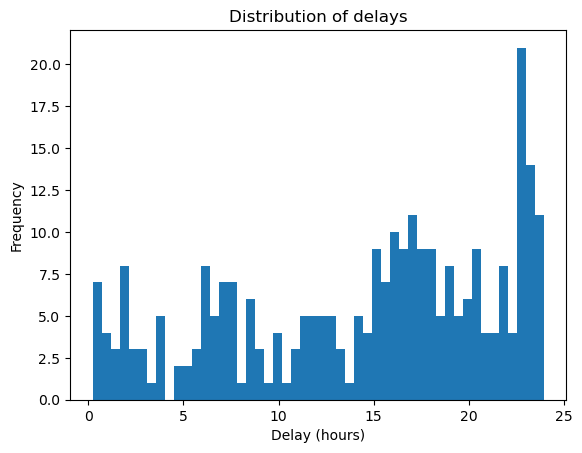

In [17]:
# Convert to hours
delay_hours = delay.delay.dt.total_seconds() / 3600

# Distribution of delays
delay_hours.hist(bins=50, grid=False)
plt.xlabel('Delay (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of delays')
plt.show()


In [18]:
flights_delay=flights_planes.merge(delay, how="left", on="flight_id")
#flights_delay.delay.fillna(pd.Timedelta(0), inplace=True)
flights_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   flight_id               1363 non-null   object             
 1   departure_time          1363 non-null   datetime64[ns, UTC]
 2   arrival_time            1363 non-null   datetime64[ns, UTC]
 3   passenger_count         1363 non-null   int64              
 4   status                  1363 non-null   category           
 5   flight_number           1354 non-null   object             
 6   origin_airport_id       1363 non-null   object             
 7   destination_airport_id  1363 non-null   object             
 8   airline_id              1363 non-null   object             
 9   plane_id                1363 non-null   object             
 10  airline_name            1363 non-null   object             
 11  country                 1363 non-null   obj

In [19]:
flights_delay.pivot_table(index="airline_name", values="delay", aggfunc="mean").sort_values("delay")

,delay
airline_name,
Tiphook PLC,0 days 01:18:00
Lufthansa Cargo,0 days 03:35:00
Juneyao Airlines,0 days 04:12:00
Philippine Airlines,0 days 05:13:00
Air Caledonie International,0 days 05:14:00
...,...
Tiger Airways Australia,0 days 23:10:00
Tiger Airways,0 days 23:10:00
Jeju Air,0 days 23:12:30


### 8. Quel aéroport a enregistré le plus de vols entrants et sortants ?

In [30]:
# Pivot table to count
def incoming_outgoing_flights(column_airport_id, column_flight):
    """
    Creates a pivot table counting flights per airport based on specified columns.
    
    Parameters:
    column_airport_id (str): Name of the column containing airport IDs
    column_flight (str): Name to use for the count column in the output
    
    Returns:
    pandas.DataFrame: Pivot table with airport IDs as index and flight counts
    
    """
    return flights_delay.pivot_table(index=column_airport_id, values="flight_id", 
                                     aggfunc="count").rename(columns={"flight_id": column_flight}).rename_axis("airport_id")

nber_outgoing_flights= incoming_outgoing_flights("origin_airport_id", "origin_flight")
nber_incoming_flights= incoming_outgoing_flights("destination_airport_id", "destination_flight")


In [38]:
# Merge pivot_table
nber_incoming_outgoing_flights=nber_outgoing_flights.merge(nber_incoming_flights, how="outer", on="airport_id").fillna(0).reset_index()

# Add column origin_flight	+ 	destination_flight
nber_incoming_outgoing_flights["origin_destination_flight"]=nber_incoming_outgoing_flights.origin_flight+nber_incoming_outgoing_flights.destination_flight
nber_incoming_outgoing_flights

# Merge to get name of airport
nber_incoming_outgoing_flights.merge(airports.loc[:,["airport_id", "airport_name"]], how="left", on="airport_id")

,airport_id,origin_flight,destination_flight,origin_destination_flight,airport_name
0,BIKF,0.0,1.0,1.0,Keflavik International Airport
1,CYEG,0.0,3.0,3.0,Edmonton International Airport
2,CYHZ,0.0,1.0,1.0,Halifax / Stanfield International Airport
3,CYUL,1.0,12.0,13.0,Montreal / Pierre Elliott Trudeau Internationa...
4,CYVR,12.0,18.0,30.0,Vancouver International Airport
...,...,...,...,...,...
333,ZWKM,0.0,1.0,1.0,Karamay Airport
334,ZWSH,0.0,2.0,2.0,Kashgar Airport
335,ZWWW,1.0,4.0,5.0,Ürümqi Diwopu International Airport
336,ZYCC,1.0,1.0,2.0,Longjia Airport
